<a href="https://colab.research.google.com/github/LucianoBV/Procesamiento-del-habla/blob/main/De_Nuevo_Clasificac%C3%ADon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Presentacion del data set:

El conjunto de datos  pertenece a sintomas que estan relacionados con la enfermedad de la diabetes. Contiene los siguientes tipos de variables:

Variables numéricas: 1 y variables categoricas: 16



In [116]:
# Importamos el dataset
data=pd.read_csv('/content/diabetes_data_upload.csv')

In [117]:
# Mostramos las primeras filas del data set
data.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [118]:
# Obtener los tipos de variables en el dataset
data_types = data.dtypes
data_types


,0
Age,int64
Gender,object
Polyuria,object
Polydipsia,object
sudden weight loss,object
weakness,object
Polyphagia,object
Genital thrush,object
visual blurring,object
Itching,object


In [119]:
data.shape

(520, 17)

# Pre-procesamiento del dataset

Se verificaran valores nulos, codificación de variables categóricas, separación de datos en variables de entrada/salida, y normalización.




In [120]:
# Verificar si hay valores nulos en el dataset
null_values = data.isnull().sum()
null_values[null_values > 0]

,0


In [121]:
# Codificamos las variables categóricas (o y 1)
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == "object":
        data[column] = label_encoder.fit_transform(data[column])

In [122]:
# Separamos la variable objetivo
X = data.drop('class', axis=1)
y = data['class']


In [123]:
# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Estandarizamos las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Mostramos los datos procesados
X_train[:5], y_train[:5]


(array([[ 0.3866783 ,  0.73923501,  1.02927447,  1.1506617 ,  1.24585201,
          0.84376191,  1.10125654, -0.52915026,  1.06458129, -0.99520381,
          1.72101852, -0.9258201 ,  1.17932379, -0.77857409,  1.31789306,
         -0.43424812],
        [-0.59566168,  0.73923501,  1.02927447,  1.1506617 ,  1.24585201,
          0.84376191,  1.10125654,  1.88982237,  1.06458129,  1.00481931,
          1.72101852, -0.9258201 , -0.84794355, -0.77857409, -0.75878691,
          2.30283093],
        [ 0.46853996,  0.73923501, -0.97155815, -0.86906517,  1.24585201,
          0.84376191, -0.90805363,  1.88982237, -0.93933644, -0.99520381,
         -0.58105127,  1.08012345, -0.84794355, -0.77857409,  1.31789306,
         -0.43424812],
        [ 0.1410933 , -1.35274978, -0.97155815, -0.86906517, -0.80266355,
          0.84376191, -0.90805363, -0.52915026,  1.06458129,  1.00481931,
         -0.58105127,  1.08012345, -0.84794355, -0.77857409,  1.31789306,
         -0.43424812],
        [-0.84124668

Todas las columnas categóricas fueron convertidas a valores numéricos.
Los datos se dividieron en conjuntos de entrenamiento y prueba, con un 80% de datos para entrenamiento y un 20% para prueba.
Estandarización: Las características numéricas fueron estandarizadas para que tengan media cero y desviación estándar uno, lo cual es mejor para los modelos de aprendizaje automático.

# Explicación del objetivo
El objetivo de este modelo es clasificar si una persona tiene o no diabetes en función de una serie de síntomas y características personales. Este es un problema de clasificación binaria, donde la variable de salida es la columna class, que tiene dos clases posibles:

Positive (1): Indica que la persona tiene diabetes.
Negative (0): Indica que la persona no tiene diabetes.
Cada registro representa la información de un paciente.

Dado que la clasificación es binaria, el modelo tratará de predecir si un nuevo conjunto de datos de síntomas corresponde a un caso positivo o negativo de diabetes, basándose en patrones aprendidos del conjunto de datos de entrenamiento.

# Elección de modelos de clasificación a entrenar.


##Árbol de Decisión

Explicación:


Creamos una instancia del modelo. Se utiliza random_state=42 para obtener resultados reproducibles.
Entrenar el modelo: Se entrena el modelo utilizando los datos de entrenamiento.

Realizar predicciones: Se utilizan los datos de prueba para realizar predicciones utilizando el modelo entrenado. El método predict devuelve las predicciones para cada instancia en los datos de prueba, recorriendo el árbol de decisión.

Evaluar el rendimiento: Se evalúa el rendimiento del modelo comparando las predicciones con los valores reales. Se utiliza la función accuracy_score para calcular la precisión del modelo, que es la proporción de predicciones correctas.

In [125]:
from sklearn.tree import DecisionTreeClassifier

# Creamos una instancia del modelo de Árbol de Decisión
modelo_dt = DecisionTreeClassifier(random_state=42)

# Entrenamos el modelo con los datos de entrenamiento
modelo_dt.fit(X_train, y_train)

# Realizamos predicciones sobre los datos de prueba
y_pred = modelo_dt.predict(X_test)

# Evaluamos el rendimiento del modelo
from sklearn.metrics import accuracy_score
precisionDTC = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precisionDTC}")

Precisión del modelo: 0.9519230769230769


##Regresión Logística

Explicación:

Creamos una instancia del modelo, entrenamos, realizamos prediciones y evaluamos el rendimiento del modelo comparando las predicciones con los valores reales. Se utiliza la función accuracy_score para calcular la precisión del modelo, que es la proporción de predicciones correctas.

In [126]:
# Importamos la clase LogisticRegression
from sklearn.linear_model import LogisticRegression

# Creamos una instancia del modelo de Regresión Logística
modelo_lr = LogisticRegression()

# Entrenamos el modelo con los datos de entrenamiento
modelo_lr.fit(X_train, y_train)

# Realizamos predicciones sobre los datos de prueba
y_pred = modelo_lr.predict(X_test)

# Evaluamos el rendimiento del modelo
from sklearn.metrics import accuracy_score
precisionLR = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precisionLR}")

Precisión del modelo: 0.9230769230769231


## De los dos modelos entrenados, Regresión Logística es mejor para este caso particular que el Árbol de Decisión. Esto se debe a que la precisión obtenida con la Regresión Logística es mayor, lo que indica un mejor rendimiento en la clasificación de pacientes con y sin diabetes.



In [127]:
print(f"Precisión del modelo de LogisticRegression : {precisionLR}")
print(f"Precisión del modelo de DecisionTreeClassifier: {precisionDTC}")

Precisión del modelo de LogisticRegression : 0.9230769230769231
Precisión del modelo de DecisionTreeClassifier: 0.9519230769230769


##Matriz de confucion

Explicación:

La matriz de confusión muestra la cantidad de predicciones correctas e incorrectas del modelo organizadas en una tabla.

Verdaderos Negativos (VN): En la esquina superior izquierda. Representan las instancias que el modelo predijo correctamente como No Diabetes.

Falsos Positivos (FP): En la esquina superior derecha. Representan las instancias que el modelo predijo incorrectamente como Diabetes cuando en realidad son No Diabetes.

Falsos Negativos (FN): En la esquina inferior izquierda. Representan las instancias que el modelo predijo incorrectamente como No Diabetes cuando en realidad son Diabetes.

Verdaderos Positivos (VP): En la esquina inferior derecha. Representan las instancias que el modelo predijo correctamente como Diabetes.

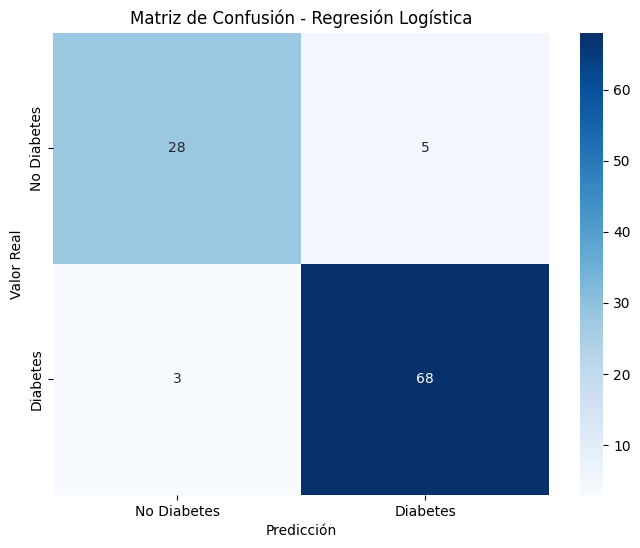

In [128]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Creamos una visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

##Conclucion del la matriz

Como vemos la matriz de confusión tiene muchos VP y VN, y pocos FP y FN, lo que significa que el modelo tiene una buena capacidad para clasificar correctamente a las personas con y sin diabetes. Si hay muchos FP, indica que el modelo está clasificando erróneamente a personas sanas como diabéticas. Si hay muchos FN, significa que el modelo está fallando en la detección de personas con diabetes.

# Regresión Logística con diferentes hiperparametros

In [129]:
parametros = {
       'penalty': ['l1', 'l2'],
       'C': [0.1, 1, 10],
       'solver': ['liblinear', 'saga']
   }

Este código define un diccionario llamado parametros que se utiliza para configurar una búsqueda de cuadrícula (Grid Search) para el modelo de Regresión Logística. La búsqueda de cuadrícula se usa para encontrar la mejor combinación de hiperparámetros para el modelo, aquellos valores que producen el mejor rendimiento.


**Penalty**: Este hiperparámetro controla el tipo de regularización que se aplica al modelo. La regularización se usa para evitar el sobreajuste, que es cuando el modelo se ajusta demasiado bien a los datos de entrenamiento pero no generaliza bien a datos nuevos.

Las opciones **l1 y l2** corresponden a dos tipos diferentes de regularización. 'l1' puede llevar a que algunos coeficientes del modelo sean cero, lo que puede ser útil para la selección de características.

C: Este hiperparámetro controla la fuerza de la regularización. Un valor más pequeño de C significa una regularización más fuerte. En este caso, se prueban tres valores diferentes: 0.1, 1 y 10.

**solver:** Este hiperparámetro especifica el algoritmo que se utiliza para optimizar el modelo. En este caso, se prueban dos algoritmos diferentes: 'liblinear' y 'saga'. 'liblinear' es un buen algoritmo para conjuntos de datos pequeños, mientras que 'saga' es más eficiente para conjuntos de datos grandes. Los solvers 'liblinear' y 'saga' son compatibles con las penalizaciones 'l1' y 'l2'.


In [130]:
grid_search = GridSearchCV(LogisticRegression(), parametros, cv=5, scoring='accuracy')


Se crea un objeto llamado **grid_search** que se encargará de realizar la búsqueda de cuadrícula y se especifica que el modelo que se quiere optimizar es un modelo de Regresión Logística.

parametros: Este argumento es el diccionario definido previamente que contiene los hiperparámetros que se quieren probar y sus posibles valores.
Se probarán todas las combinaciones posibles de penalty, C y solver.

cv=5: Indica que se utilizará una validación cruzada con 5 pliegues (folds). Esto significa que los datos de entrenamiento se dividirán en 5 partes, y el modelo se entrenará 5 veces, utilizando cada vez una parte diferente como conjunto de prueba y las otras 4 como conjunto de entrenamiento.
La métrica que se utilizará para evaluar el rendimiento del modelo es la precisión (accuracy). La precisión es la proporción de predicciones correctas sobre el total de predicciones.

In [131]:
grid_search.fit(X_train, y_train);

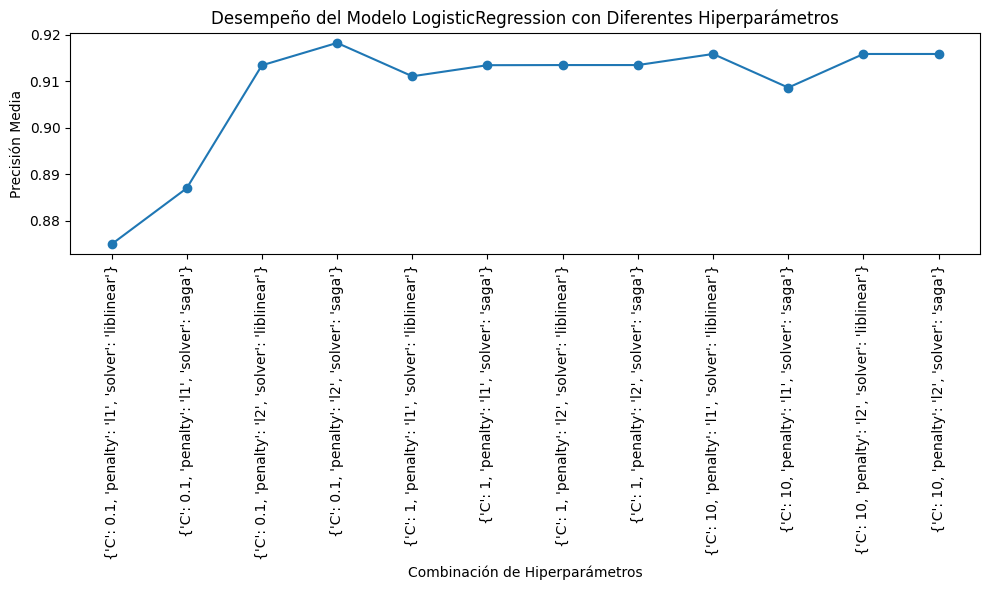

In [132]:
resultados = grid_search.cv_results_

# Extraer la precisión media para cada combinación de hiperparámetros
precisiones_medias = resultados['mean_test_score']

# Creamos una lista de nombres que representan cada combinación de los hiperparámetros probados.
nombres_hiperparametros = [str(params) for params in resultados['params']]

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(nombres_hiperparametros, precisiones_medias, marker='o')
plt.xlabel('Combinación de Hiperparámetros')
plt.ylabel('Precisión Media')
plt.title('Desempeño del Modelo LogisticRegression con Diferentes Hiperparámetros')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

El gráfico analiza el rendimiento del modelo de Regresión Logística en función de diferentes combinaciones de hiperparámetros (penalty, C y solver). Cada punto representa una configuración específica y su precisión media durante la validación cruzada.

Interpretación clave:

Variación en precisión: La precisión varía según la combinación de hiperparámetros, destacándose algunas configuraciones por su mayor rendimiento.
Combinación óptima: El punto más alto del gráfico indica la configuración con mayor precisión media, considerada ideal para el modelo.
Influencia de los hiperparámetros: Se puede evaluar cómo afectan al rendimiento aspectos como el tipo de penalización (l1 o l2), el valor de C o el solver.
Facilidad de comparación: El gráfico permite identificar visualmente las configuraciones más prometedoras.
En resumen, esta representación visual facilita identificar la combinación óptima de hiperparámetros para maximizar la precisión del modelo, proporcionando información valiosa para el ajuste y optimización del rendimiento.

##Creamos un nuevo modelo con esa configuración, lo entrenamos, realizamos predicciones sobre datos de prueba, evalúamos su precisión y por ultimo mestramos la precisión obtenida del modelo optimizado.

In [143]:
mejores_hiperparametros = grid_search.best_params_
print("Los mejores hiperparametros:", mejores_hiperparametros)

Los mejores hiperparametros: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [136]:
modelo_lr_optimizado = LogisticRegression(**mejores_hiperparametros)

In [141]:
modelo_lr_optimizado.fit(X_train, y_train);

In [140]:
y_pred_optimizado = modelo_lr_optimizado.predict(X_test)
precision_optimizada = accuracy_score(y_test, y_pred_optimizado)
print(f"Precisión del modelo optimizado: {precision_optimizada}")

Precisión del modelo optimizado: 0.9326923076923077


## Conclusión Final
En el análisis que se realizo para predecir la diabetes en pacientes utilizando aprendizaje automático, después de preparar y procesar los datos, se probaron dos modelos: Árbol de Decisión y Regresión Logística.
La Regresión Logística mostró mejor precisión y se seleccionó como el modelo más adecuado.

Se optimizaron los hiperparámetros de este modelo mediante Grid Search, lo que permitió mejorar su rendimiento.

Se avaluo con una matriz de confusión confirmando su capacidad para clasificar correctamente a pacientes con y sin diabetes, con pocos errores.

En conclusión, el modelo optimizado de Regresión Logística demuestro ser el mejor para este proyecto.